# Assignment 2

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\pjanh\\Desktop\\sales_data.csv")
df.head()

,flag,gender,education,house_val,age,online,customer_psy,occupation,mortgage,region,car_prob,fam_income
0,Y,M,4. Grad,75646.0,1_Unk,N,B,Professional,1Low,Midwest,1.0,L
1,N,F,3. Bach,213171.0,7_>65,N,E,Professional,1Low,Northeast,3.0,G
2,N,M,2. Some College,111147.0,2_<=25,Y,C,Professional,1Low,Midwest,1.0,J
3,Y,M,2. Some College,354151.0,2_<=25,Y,B,Sales/Service,1Low,West,2.0,L
4,Y,F,2. Some College,11787.0,1_Unk,Y,J,Sales/Service,1Low,South,7.0,H


1.Importing all the necessary libraries.
2.Load the date file in df using "read_csv"

In [3]:
df.shape

(40000, 12)

Shows the dimensions of dataframe (rows,columns)

In [4]:
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online',
       'customer_psy', 'occupation', 'mortgage', 'region', 'car_prob',
       'fam_income'],
      dtype='object')

Gives the list of columns in dataframe

In [5]:
df.isnull().sum()

flag               0
gender             0
education        741
house_val       7696
age                0
online             0
customer_psy       0
occupation         0
mortgage           0
region             0
car_prob         127
fam_income         0
dtype: int64

Returns the number of missing values in the data set.

In [6]:
df.describe()

,house_val,car_prob
count,3.230400e+04,39873.000000
mean,1.993657e+05,3.502270
std,3.429706e+05,2.574268
min,1.000000e+00,1.000000
25%,1.936500e+04,1.000000
50%,7.782600e+04,3.000000
75%,2.696110e+05,5.000000
max,9.999999e+06,9.000000


used to view some basic statistical details

In [7]:
df.dtypes

flag             object
gender           object
education        object
house_val       float64
age              object
online           object
customer_psy     object
occupation       object
mortgage         object
region           object
car_prob        float64
fam_income       object
dtype: object

checks the data type of all columns

In [8]:
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missingvalues_count = df.isna().sum()
missingvalues_df = pd.DataFrame (missingvalues_count.rename('Null values count')).loc[missingvalues_count.ne(0)]
missingvalues_df.style.background_gradient(cmap="tab20c")

,Null values count
education,741
house_val,7696
car_prob,127


shows the columns with missing values

# Filling the missing values

In [9]:
df['education'] = df['education'].replace(np.nan,df['education'].mode()[0])
df['house_val'] = df['house_val'].replace(np.nan,df['house_val'].mean())
df['car_prob'] = df['car_prob'].replace(np.nan,df['car_prob'].mode()[0])
df.isnull().sum()

flag            0
gender          0
education       0
house_val       0
age             0
online          0
customer_psy    0
occupation      0
mortgage        0
region          0
car_prob        0
fam_income      0
dtype: int64

1) missing values in 'education' filled with mode of value in 'education'
2) missing values in 'house_val' filled with mean of value in 'house_val'
3) missing values in 'car_prob' filled with mode of value in 'car_prob'

# Detect and remove outliers

What is an Outlier?

An outlier is a data point in a data set that is distant from all other observation.

<AxesSubplot:xlabel='house_val', ylabel='Density'>

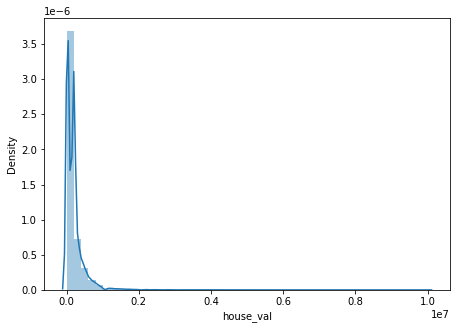

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['house_val'])

In [11]:
print("Highest allowed",df['house_val'].mean() + 3*df['house_val'].std())
print("Lowest allowed",df['house_val'].mean() - 3*df['house_val'].std())

Highest allowed 1124010.783196662
Lowest allowed -725279.4104873977


Finding the highest and lowest allowed values

In [12]:
df[(df['house_val'] > 1124010.78) | (df['house_val'] < -725279.41)]

,flag,gender,education,house_val,age,online,customer_psy,occupation,mortgage,region,car_prob,fam_income
34,Y,M,2. Some College,1151448.0,3_<=35,N,B,Professional,2Med,South,1.0,F
63,Y,M,3. Bach,1383733.0,6_<=65,Y,B,Professional,1Low,South,1.0,K
165,Y,M,4. Grad,1856444.0,5_<=55,Y,C,Professional,1Low,West,6.0,K
195,Y,M,2. Some College,1256225.0,1_Unk,Y,B,Sales/Service,3High,West,1.0,L
363,Y,M,2. Some College,1552846.0,1_Unk,Y,B,Others,3High,South,1.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...
39205,Y,M,2. Some College,2792122.0,4_<=45,Y,C,Professional,3High,West,1.0,J
39436,Y,M,3. Bach,1185375.0,1_Unk,Y,B,Professional,3High,South,1.0,L
39604,N,F,3. Bach,1197692.0,4_<=45,Y,C,Professional,3High,West,1.0,H
39799,Y,M,3. Bach,1547255.0,5_<=55,Y,B,Professional,1Low,Northeast,1.0,L


Showing the outliers.

# Trimming of Outliers

Creating a new df and storing the values except outliers in it.

In [13]:
new_df = df[(df['house_val'] < 1124010.78) & (df['house_val'] > -725279.41)]
new_df

,flag,gender,education,house_val,age,online,customer_psy,occupation,mortgage,region,car_prob,fam_income
0,Y,M,4. Grad,75646.000000,1_Unk,N,B,Professional,1Low,Midwest,1.0,L
1,N,F,3. Bach,213171.000000,7_>65,N,E,Professional,1Low,Northeast,3.0,G
2,N,M,2. Some College,111147.000000,2_<=25,Y,C,Professional,1Low,Midwest,1.0,J
3,Y,M,2. Some College,354151.000000,2_<=25,Y,B,Sales/Service,1Low,West,2.0,L
4,Y,F,2. Some College,11787.000000,1_Unk,Y,J,Sales/Service,1Low,South,7.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Y,F,3. Bach,199365.686355,7_>65,Y,C,Retired,1Low,South,3.0,F
39996,N,F,1. HS,213596.000000,4_<=45,N,I,Blue Collar,1Low,South,1.0,D
39997,Y,M,. <HS,1347.000000,3_<=35,Y,F,Sales/Service,1Low,Midwest,4.0,E
39998,N,M,1. HS,4221.000000,7_>65,Y,E,Sales/Service,1Low,West,2.0,B


 # Capping on Outliers

In [14]:
upper_limit = df['house_val'].mean() + 3*df['house_val'].std()
lower_limit = df['house_val'].mean() - 3*df['house_val'].std()

In [15]:
df['house_val'] = np.where(
    df['house_val']>upper_limit,
    upper_limit,
    np.where(
        df['house_val']<lower_limit,
        lower_limit,
        df['house_val']
    )
)

In [16]:
df['house_val'].describe()

count    4.000000e+04
mean     1.881645e+05
std      2.139570e+05
min      1.000000e+00
25%      2.659500e+04
50%      1.646600e+05
75%      2.218008e+05
max      1.124011e+06
Name: house_val, dtype: float64